## Getting started with a dataset

The first step would be to read the data and explore through it.

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns

In [205]:
data = pd.read_csv('dataset.csv')
data

,x0,x1,x2,x3,x4,y
0,lyseevu,2.327526,7.327260,10.909794,g,1.0
1,ynlaqgkj,0.128880,2.412095,2.547748,p,0.0
2,vxfihcgyhndi,1.436324,6.600719,22.627917,p,1.0
3,kjvoogutxvb,2.014618,6.939049,9.248719,r,1.0
4,srrssppovjjvp,1.227858,9.976824,18.906464,p,1.0
...,...,...,...,...,...,...
195,anxwsrrvdwfv,-0.907478,9.487626,2.898387,r,0.0
196,bbpptegcqkc,1.284137,0.740918,10.970663,r,0.0
197,vwoqilzzq,2.214714,5.775563,13.947454,g,1.0
198,whykrupuod,1.872437,4.844288,2.752800,p,0.0


The data has 5 columns, with the last column being the result. The artificially generated data was made in such a way, it depends only on the columns `x2`, `x3` and `x4`. Let's see if the machine learning model finds this. To go ahead, the first step would be to explore the data.

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      200 non-null    object 
 1   x1      197 non-null    float64
 2   x2      196 non-null    float64
 3   x3      200 non-null    float64
 4   x4      197 non-null    object 
 5   y       200 non-null    float64
dtypes: float64(4), object(2)
memory usage: 9.5+ KB


`x0` seems to have a unique value for every row, encoding for a name of sorts which will not have useful information for the machine learning model. So we can drop it. We find that the data has some null values. Since we can't drop the rows or columns entirely as we will miss out on data, we will have to impute the data. We also find that the column `x4` has categorical variables, so we will convert that into numerical data as well.

In [207]:
data = data.drop(['x0'], axis=1)

In [208]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='most_frequent')
data1 = pd.DataFrame(imputer1.fit_transform(data.drop(['x4'], axis=1)))
data2 = pd.DataFrame(imputer2.fit_transform(data))
df = data1.merge(data2, how='inner', left_on=data1.index, right_on=data2.index)
df = df.drop(['key_0', '3_x', '0_y', '1_y', '2_y'], axis=1)
df.columns = data.columns
df

,x1,x2,x3,x4,y
0,2.327526,7.327260,10.909794,g,1
1,0.128880,2.412095,2.547748,p,0
2,1.436324,6.600719,22.627917,p,1
3,2.014618,6.939049,9.248719,r,1
4,1.227858,9.976824,18.906464,p,1
...,...,...,...,...,...
195,-0.907478,9.487626,2.898387,r,0
196,1.284137,0.740918,10.970663,r,0
197,2.214714,5.775563,13.947454,g,1
198,1.872437,4.844288,2.752800,p,0


In [209]:
categorical = LabelEncoder()
df['x4'] = categorical.fit_transform(df['x4'])
df

,x1,x2,x3,x4,y
0,2.327526,7.327260,10.909794,0,1
1,0.128880,2.412095,2.547748,1,0
2,1.436324,6.600719,22.627917,1,1
3,2.014618,6.939049,9.248719,2,1
4,1.227858,9.976824,18.906464,1,1
...,...,...,...,...,...
195,-0.907478,9.487626,2.898387,2,0
196,1.284137,0.740918,10.970663,2,0
197,2.214714,5.775563,13.947454,0,1
198,1.872437,4.844288,2.752800,1,0


With numeric features in our final dataset, we can check out the statistics of the data.

In [222]:
df['y'] = df['y'].astype('int')
df.describe()

,x1,x2,x3,x4,y
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1.021377,5.132787,8.935687,1.120000,0.285000
std,0.972991,2.721206,7.009133,0.824012,0.452547
min,-1.258023,0.085340,-8.673874,0.000000,0.000000
25%,0.340965,2.876553,3.448023,0.000000,0.000000
50%,0.999916,5.235823,8.165976,1.000000,0.000000
75%,1.670055,7.316269,14.043083,2.000000,1.000000
max,4.009522,9.976824,30.092361,2.000000,1.000000


We can now make a pairplot of the data to search for any obvious patterns or important features in the data. The categorical feature gives some line-like plots, while the other scatter plots don't reveal any distinct separation.

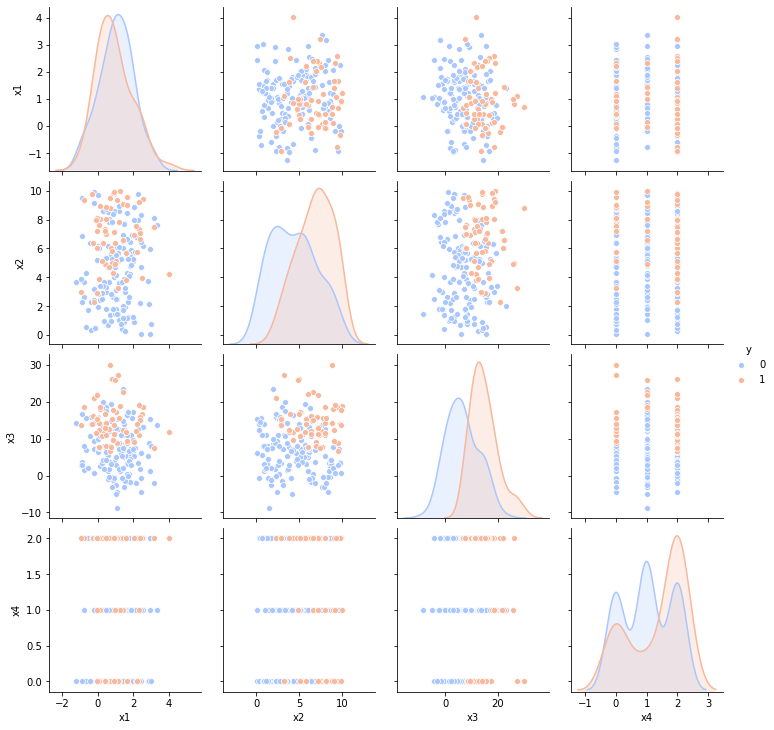

In [238]:
sns.pairplot(df, hue='y', palette='coolwarm')

Now let's split the data into train and test sets and get a baseline performance from an SVM classifier.

In [131]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['y'], axis=1), df['y'], test_size=0.2)

In [132]:
svm = SVC()
svm.fit(X_train, y_train)
train_score = svm.score(X_train, y_train)
test_score = svm.score(X_test, y_test)
print('The model classified {:.4f}% of the train set correctly'.format(train_score*100))
print('The model classified {:.4f}% of the test set correctly'.format(test_score*100))

The model classified 87.5000% of the train set correctly
The model classified 77.5000% of the test set correctly


The model seems to do pretty well. To improve the performance, we can tune some hyperparameters. For this, let's use the scikit-learn class `RandomizedSearchCV` which will test out hyperparameters for the model with cross validation.

In [133]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'gamma':np.logspace(-3, 3, 7), 'C':np.logspace(-3, 3, 7)}
model = RandomizedSearchCV(svm, parameters)
model.fit(X_train, y_train)
print(model.best_params_)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('The model classified {:.4f}% of the train set correctly'.format(train_score*100))
print('The model classified {:.4f}% of the test set correctly'.format(test_score*100))

{'gamma': 0.001, 'C': 100.0}
The model classified 89.3750% of the train set correctly
The model classified 80.0000% of the test set correctly


We can make one more change to improve our model performance even more. We can preprocess a little bit more with scaling and run the hyperparameter search again.

In [134]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [135]:
parameters = {'gamma':np.logspace(-3, 3, 7), 'C':np.logspace(-3, 3, 7)}
model = RandomizedSearchCV(svm, parameters)
model.fit(X_train, y_train)
print(model.best_params_)
clf = model.best_estimator_
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('The model classified {:.4f}% of the train set correctly'.format(train_score*100))
print('The model classified {:.4f}% of the test set correctly'.format(test_score*100))

{'gamma': 1.0, 'C': 1000.0}
The model classified 100.0000% of the train set correctly
The model classified 97.5000% of the test set correctly


In [193]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
parameters = {'n_estimators':[50, 100, 200, 300, 400], 'max_depth':[4, 5, 6, 7, 8]}
model = RandomizedSearchCV(rfc, parameters)
model.fit(X_train, y_train)
print(model.best_params_)
rfc = model.best_estimator_
rfc.fit(X_train, y_train)
train_score = rfc.score(X_train, y_train)
test_score = rfc.score(X_test, y_test)
print('The model classified {:.4f}% of the train set correctly'.format(train_score*100))
print('The model classified {:.4f}% of the test set correctly'.format(test_score*100))

{'n_estimators': 50, 'max_depth': 7}
The model classified 100.0000% of the train set correctly
The model classified 90.0000% of the test set correctly


Now we can either try out more models or check out which features are important for the model. We will plot them out in a bar chart and in a heatmap.

In [194]:
rfc.feature_importances_

array([0.09730833, 0.33919525, 0.43828317, 0.12521325])

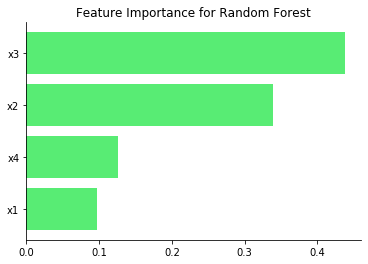

In [199]:
features = len(df.columns)
x_pos = np.arange(1, features, 1)
imps = rfc.feature_importances_
fig, ax = plt.subplots()
ax.barh(x_pos, sorted(imps), color='#58ec74')
plt.yticks([1, 2, 3, 4], labels=['x1', 'x4', 'x2', 'x3'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Feature Importance for Random Forest')
plt.show()

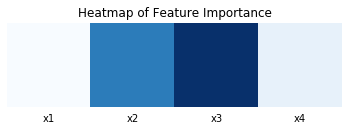

In [200]:
fig, ax = plt.subplots()
hm = sns.heatmap([imps], square=True, cmap=plt.cm.Blues, cbar=False)
ax.tick_params(left=False, bottom=False)
ax.set_xticklabels(['x1', 'x2', 'x3', 'x4'])
ax.set_yticklabels([])
plt.title('Heatmap of Feature Importance')
plt.show()